## Grafique las siguientes señales lado a lado con su respectivo espectro en frecuencias:
* senoidal
* cuadrada
* triangular
* delta en t=0

Indicando en cada caso los parámetros destacados como:
* frecuencia
* amplitud
* densidad espectral de potencia
* Fs
* N
* B


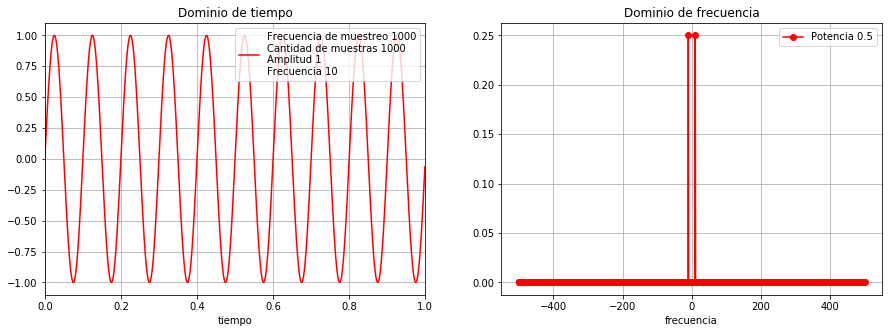

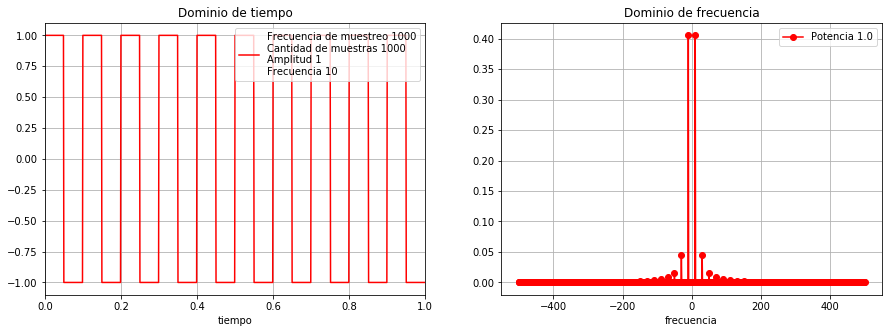

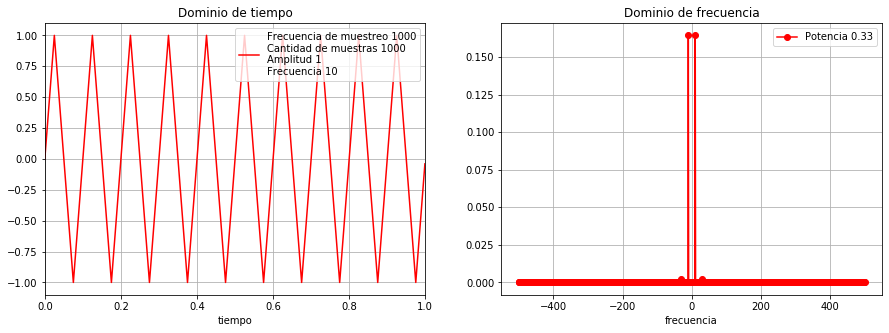

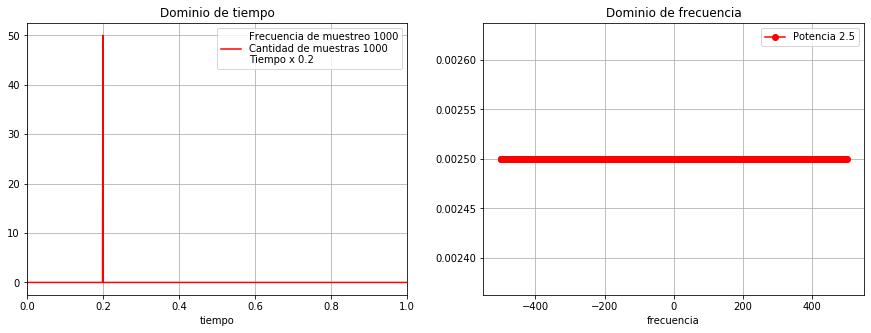

In [7]:
import numpy as np
import scipy.signal as sc
import matplotlib.pyplot as plt

class mysignal:
    fs = None
    N = None

    t = None
    f = None
    s = None
    sf = None
    
    f0 = None
    t0 = None
    amp = None
    
    def __init__(self, N=None, W=None, fs=None):
        self.N = N
        self.W = W
        self.fs = fs

        if N != None and W != None and fs != None:
            if N/fs != W:
                print("Error inicializando señal")
                
        if N != None and W != None:
            self.fs = N/W
        if N != None and fs != None:
            self.W = N/fs
        if W != None and fs != None:
            self.N = W*fs
            
        self.t = np.arange(0, self. N/self.fs, 1/self.fs)
    
    def sin(self, f0, amp, phase=0):
        self.f0 = f0
        self.amp = amp
        
        self.s = amp*np.sin(2*np.pi*f0*self.t + phase)
        return self.s

    def square(self, f0, amp, phase=0):
        self.f0 = f0
        self.amp = amp
        self.s = amp*sc.square(2*np.pi*f0*self.t + phase)
        return self.s

    def triang(self, f0, amp, phase=0):
        self.f0 = f0
        self.amp = amp
        self.s = amp*sc.sawtooth(2*np.pi*f0*self.t + phase + np.pi/2, 0.5)
        return self.s
    
    def delta(self, t0, amp):
        self.t0 = t0
        self.amp = amp
        
        self.s = np.zeros(N)
        self.s[round(t0*self.fs)] = amp
        return self.s

    def fft_density(self):
        self.f = np.arange(-self.fs/2, self.fs/2, self.fs/self.N)
        sf = ((abs(np.fft.fft(self.s)/N))**2)
        self.sf = np.fft.fftshift(sf)
        return self.sf
    
    def graph_t_f(self):
        
        if self.f == None:
            self.fft_density()
        
        fig, [ tAxe, fAxe ] = plt.subplots(1, 2, figsize=(15, 5))
        #plt.title("Ej. 1. a. Señal Sinusoidal: "+str(fs))

        tAxe.grid ( True )
        tAxe.set_title("Dominio de tiempo")
        tAxe.set_xlim(0, self.N/self.fs)
        tAxe.set_xlabel("tiempo")
        tLine, = tAxe.plot(self.t, self.s, 'r')
        
        label = "Frecuencia de muestreo "+str(self.fs)
        label = label + "\nCantidad de muestras "+str(self.N)
        
        if self.f0 != None:
            label = label + "\nAmplitud " + str(self.amp)
        if self.f0 != None:
            label = label + "\nFrecuencia "+ str(self.f0)
        if self.t0 != None:
            label = label + "\nTiempo x "+ str(self.t0)
            
        tLine.set_label(label)
        tAxe.legend(loc='upper right')

        fAxe.grid ( True )
        fAxe.set_title("Dominio de frecuencia")
        #fAxe.set_xlim(0, N/fs)
        fAxe.set_xlabel("frecuencia")
        fLine, = fAxe.plot(self.f, self.sf, 'r-o')
        fPow = np.sum(self.sf)
        fLine.set_label("Potencia " + str(round(fPow, 2)))
        fAxe.legend(loc='upper right')
        
        plt.show()
        

f0 = 10
fase = 0
amp = 1

# N points
N = 1000
# sample rate at 1khz
fs = 1000

# sin
ms = mysignal(N=N, fs=fs)
s = ms.sin(f0, amp)
ms.graph_t_f()

# square 
ms2 = mysignal(N=N, fs=fs)
ms2.square(f0, amp)
ms2.graph_t_f()

# triang 
ms3 = mysignal(N=N, fs=fs)
ms3.triang(f0, amp)
ms3.graph_t_f()

# delta
t0 = 0.2
amp = 50
ms4 = mysignal(N=N, fs=fs)
ms4.delta(t0, amp)
ms4.graph_t_f()

#plt.show()

Se diseño un paquete en python para armar las señales dados dos de los tres parametros:
* Cantidad de muestras N
* frecuencia de muestreo fs
* Ventana de tiempo de 0 a W

El mismo grafica la señal en ambos dominios.

## Señal sinusoidal
Respecto a la señal sinusoidal podemos apreciar que la potencia espectral $ 0.25 + 0.25 = \frac{1}{2} $ coincide con la potencia de la tensión $V_{rms} = \frac{A}{\sqrt{2}} $ sobre una resistencia de 1 ohm.
Es decir como $ P = \frac{V^{2}}{R} $ entonces $ P = \frac{A^2}{2} = \frac{1}{2} $
El ancho de banda esta limitado por f0. Es decir si hubieramos muestreado a una tasa de 2 * f0 hubiera alcanzado para tener toda la información de la señal.

## Señal cuadrada
De forma similar podemos ver que la potencia espectral calculada, coincide con A^2
En este caso el ancho de banda teorico es infinito. No obstante podemos ver que con el muestreo analizado llegamos a tener una buena aproximación debido a que a partir del renondeo tenemos el total de la potencia de señal.

## Señal triangular
El valor rms de la señal triangular es $V_{rms} = \frac{A}{\sqrt{3}} $. Por lo que la potencia será $ P = \frac{A^2}{3} = \frac{1}{3} $
Al igual que la señal cuadrada podemos ver que con el muestreo realizado tenemos una buena aproximación a pesar de que el ancho de banda es infinito.

## Señal delta
En este caso se eligio una amplitud significativa para poder tener una potencia razonable. En el especto podemos comprobar que tenemoos una $ P = 0.0025 * fs = 2,5 $


## Dada la siguiente secuencia de números con N=100 y Fs=200, indique:
* Resolución espectral
* Obtenga el contenido espectral
* Que técnica conoce para mejorar la resolución en frecuencia?
* Aplique la técnica, grafique y comente los resultados


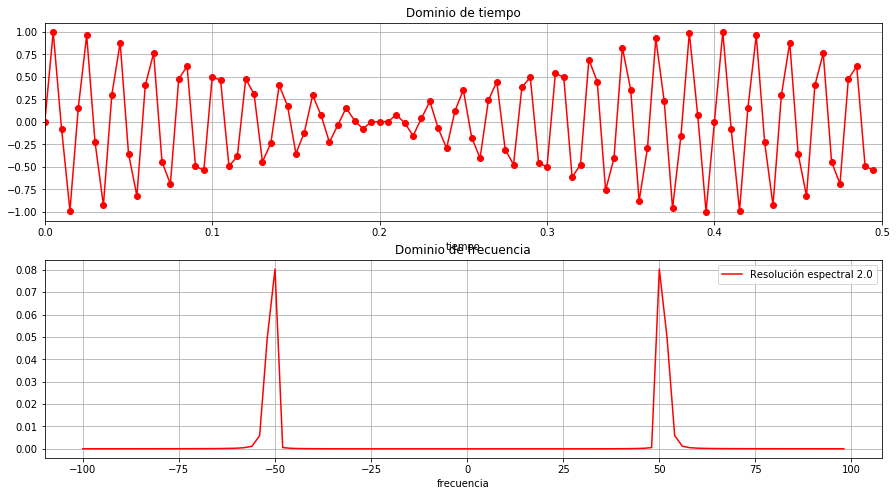

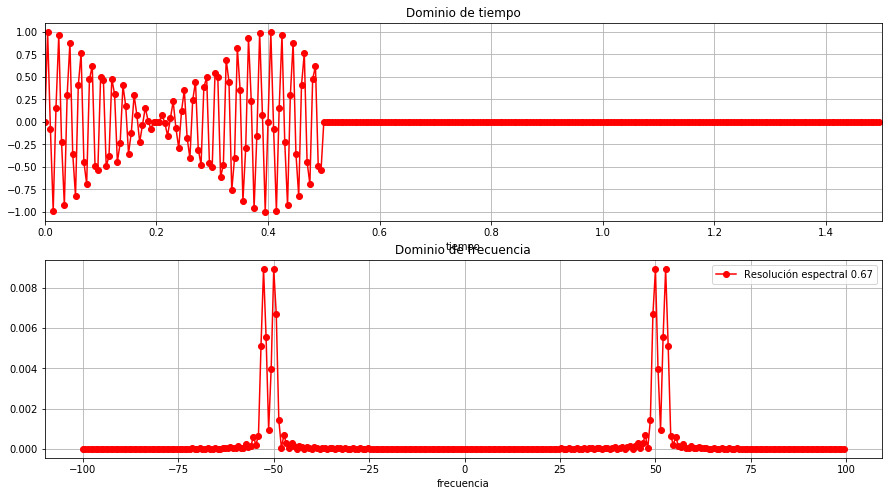

In [8]:
import numpy as np
import scipy.signal as sc
import matplotlib.pyplot as plt

N = 100
N2 = 200
fs = 200

t = np.arange(0, N/fs, 1/fs)
s = [0.00000000e+00, 9.98458667e-01, -7.82172325e-02, -9.86184960e-01, 1.54508497e-01
 , 9.61939766e-01, -2.26995250e-01, -9.26320082e-01, 2.93892626e-01, 8.80202983e-01
 , -3.53553391e-01, -8.24724024e-01, 4.04508497e-01, 7.61249282e-01, -4.45503262e-01
 , -6.91341716e-01, 4.75528258e-01, 6.16722682e-01, -4.93844170e-01, -5.39229548e-01
 , 5.00000000e-01, 4.60770452e-01, -4.93844170e-01, -3.83277318e-01, 4.75528258e-01
 , 3.08658284e-01, -4.45503262e-01, -2.38750718e-01, 4.04508497e-01, 1.75275976e-01
 , -3.53553391e-01, -1.19797017e-01, 2.93892626e-01, 7.36799178e-02, -2.26995250e-01
 , -3.80602337e-02, 1.54508497e-01, 1.38150398e-02, -7.82172325e-02, -1.54133313e-03
 , 1.83758918e-15, 1.54133313e-03, 7.82172325e-02, -1.38150398e-02, -1.54508497e-01
 , 3.80602337e-02, 2.26995250e-01, -7.36799178e-02, -2.93892626e-01, 1.19797017e-01
 , 3.53553391e-01, -1.75275976e-01, -4.04508497e-01, 2.38750718e-01, 4.45503262e-01
 , -3.08658284e-01, -4.75528258e-01, 3.83277318e-01, 4.93844170e-01, -4.60770452e-01
 , -5.00000000e-01, 5.39229548e-01, 4.93844170e-01, -6.16722682e-01, -4.75528258e-01
 , 6.91341716e-01, 4.45503262e-01, -7.61249282e-01, -4.04508497e-01, 8.24724024e-01
 , 3.53553391e-01, -8.80202983e-01, -2.93892626e-01, 9.26320082e-01, 2.26995250e-01
 , -9.61939766e-01, -1.54508497e-01, 9.86184960e-01, 7.82172325e-02, -9.98458667e-01
 , 5.63708916e-15, 9.98458667e-01, -7.82172325e-02, -9.86184960e-01, 1.54508497e-01
 , 9.61939766e-01, -2.26995250e-01, -9.26320082e-01, 2.93892626e-01, 8.80202983e-01
 , -3.53553391e-01, -8.24724024e-01, 4.04508497e-01, 7.61249282e-01, -4.45503262e-01
 , -6.91341716e-01, 4.75528258e-01, 6.16722682e-01, -4.93844170e-01, -5.39229548e-01]

fig, [ tAxe, fAxe ] = plt.subplots(2, 1, figsize=(15, 8))

tAxe.grid ( True )
tAxe.set_title("Dominio de tiempo")
tAxe.set_xlim(0, N/fs)
tAxe.set_xlabel("tiempo")
tLine, = tAxe.plot(t, s, 'r-o')

fAxe.grid ( True )
fAxe.set_title("Dominio de frecuencia")
#fAxe.set_xlim(0, N/fs)
fAxe.set_xlabel("frecuencia")

f = np.arange(-fs/2,fs/2,fs/N)
sf = ((abs(np.fft.fft(s)/N))**2)
sf = np.fft.fftshift(sf)
fLine, = fAxe.plot(f, sf, 'r')
fLine.set_label("Resolución espectral " + str(round(fs/N, 2)))
fAxe.legend(loc='upper right')

# 
s2 = np.zeros(abs(N2))
s=np.concatenate((s, s2))
N = N + N2
t = np.arange(0, N/fs, 1/fs)
fig, [ tAxe, fAxe ] = plt.subplots(2, 1, figsize=(15, 8))

tAxe.grid ( True )
tAxe.set_title("Dominio de tiempo")
tAxe.set_xlim(0, N/fs)
tAxe.set_xlabel("tiempo")
tLine, = tAxe.plot(t, s, 'r-o')


fAxe.grid ( True )
fAxe.set_title("Dominio de frecuencia")
#fAxe.set_xlim(0, N/fs)
fAxe.set_xlabel("frecuencia")

f = np.arange(-fs/2,fs/2,fs/N)
sf = ((abs(np.fft.fft(s)/N))**2)
sf = np.fft.fftshift(sf)
fLine, = fAxe.plot(f, sf, 'r-o')
fLine.set_label("Resolución espectral " + str(round(fs/N, 2)))
fAxe.legend(loc='upper right')


plt.show()

A través de agregar muestras a la señal. En este caso hicimos padding con 0, podemos ver como disminuimos la resolución espectral $ fs/N $ y podemos divisar que se distinguen dos picos de frecuencia.

## Anti transformada discreta de Fourier

Dado el siguiente espectro extraído del archivo fft_hjs.npy, indique:
* Que cree que representa esta señal? tip: grafique en 2d la idft
* Hasta que punto podría limitar el ancho de banda y que se siga interpretando su significado
 Grafique para mostrar los resultados


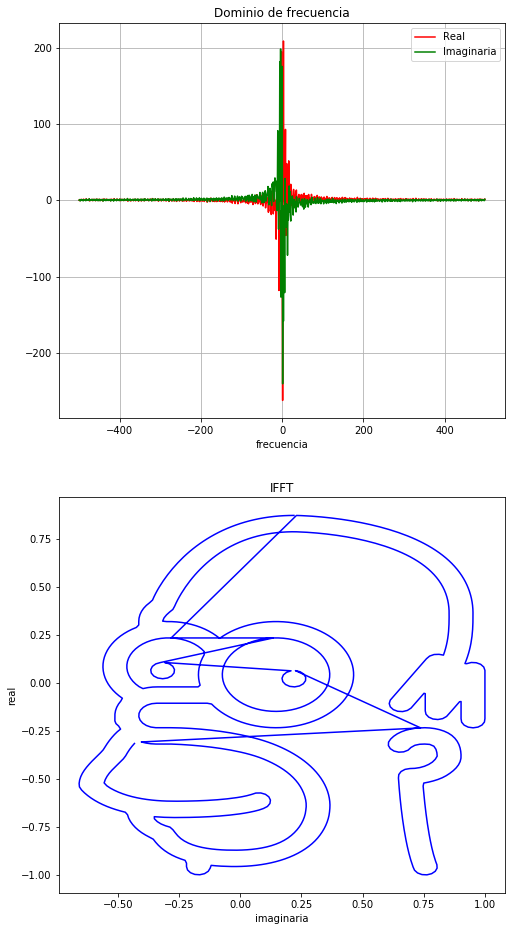

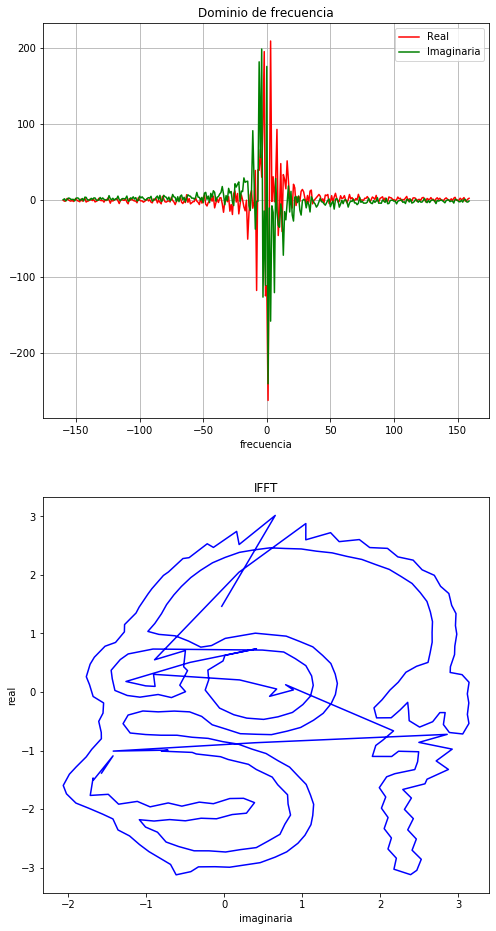

In [11]:
import numpy as np
import scipy.signal as sc
import matplotlib.pyplot as plt


sfnumpy = np.load('fft_hjs.npy')

sf = np.fft.fftshift(sfnumpy)
# supongo esto (resolucion 1hz)
fs = len(sf)
f = np.arange(-fs/2, fs/2)

fig, [ fAxe, xAxe ] = plt.subplots(2, 1, figsize=(8, 16))

fAxe.grid ( True )
fAxe.set_title("Dominio de frecuencia")
fAxe.set_xlabel("frecuencia")
frLine, = fAxe.plot(f, np.real(sf), 'r')
fiLine, = fAxe.plot(f, np.imag(sf), 'g')
frLine.set_label("Real")
fiLine.set_label("Imaginaria")
fAxe.legend(loc='upper right')

s = np.fft.ifft(sfnumpy)

xAxe.set_title("IFFT")
xAxe.set_ylabel("real")
xAxe.set_xlabel("imaginaria")
xLine, = xAxe.plot(np.imag(s), np.real(s),'b-')



sf = sf[int(fs/2-160):int(fs/2+160)]
fs = len(sf)
sfnumpy = np.fft.ifftshift(sf)
f = np.arange(-fs/2, fs/2)
fig, [ fAxe, xAxe ] = plt.subplots(2, 1, figsize=(8, 16))

fAxe.grid ( True )
fAxe.set_title("Dominio de frecuencia")
fAxe.set_xlabel("frecuencia")
frLine, = fAxe.plot(f, np.real(sf), 'r')
fiLine, = fAxe.plot(f, np.imag(sf), 'g')
frLine.set_label("Real")
fiLine.set_label("Imaginaria")
fAxe.legend(loc='upper right')

s = np.fft.ifft(sfnumpy)

xAxe.set_title("IFFT")
xAxe.set_ylabel("real")
xAxe.set_xlabel("imaginaria")
xLine, = xAxe.plot(np.imag(s), np.real(s),'b-')

plt.show()

Podemos ver que la señal representada en real vs imaginaria recorriendo en función del tiempo representa un dibujo.
Estimamos viendo el espectro en frecuencia que podremos recortar la señal poco por encima de los 160hz pudiendo interpretar la misma. Podemos ver el resultado en el segundo grupo de graficos.

## Convolución
Dado el segmento de audio en el archivo chapu_noise.npy con fs=8000 y sumergido en ruido de alta frecuencia
resuelva:
* Diseñe un filtro que mitigue el efecto del ruido
* Grafique el espectro antes y después del filtro
* Reproduzca el segmento antes y después del filtrado
* Comente los resultados obtenidos


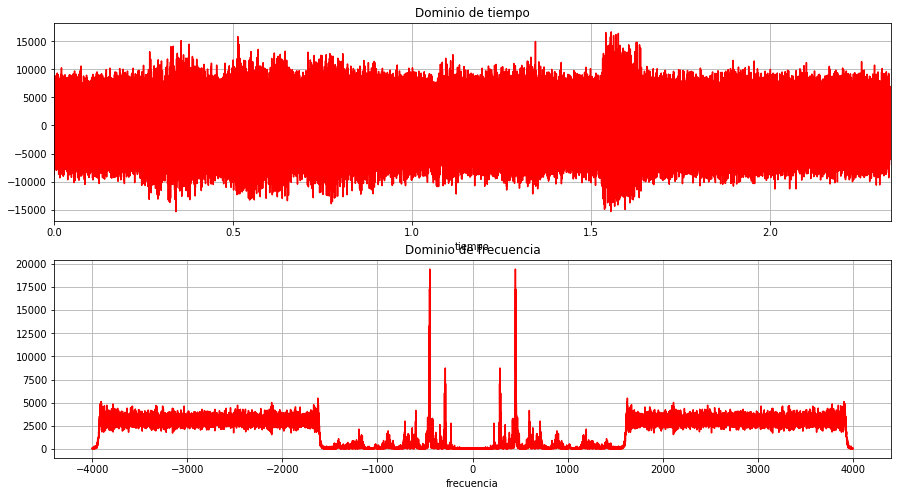

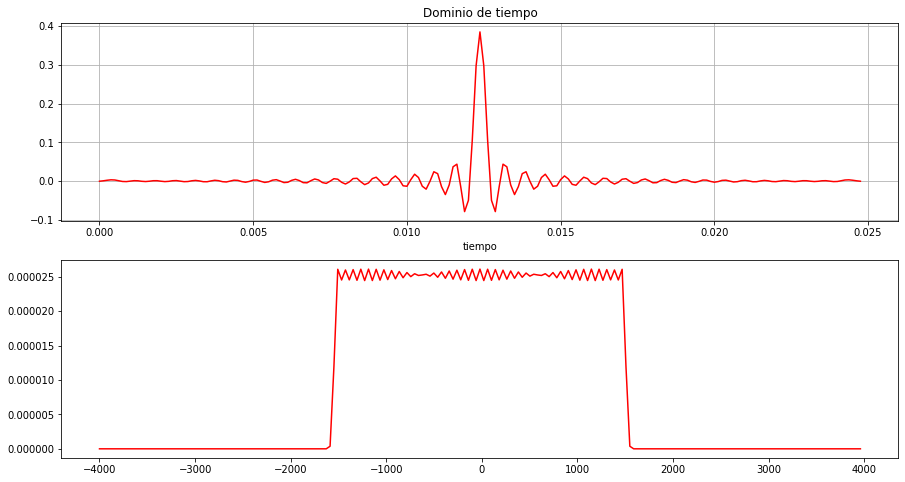

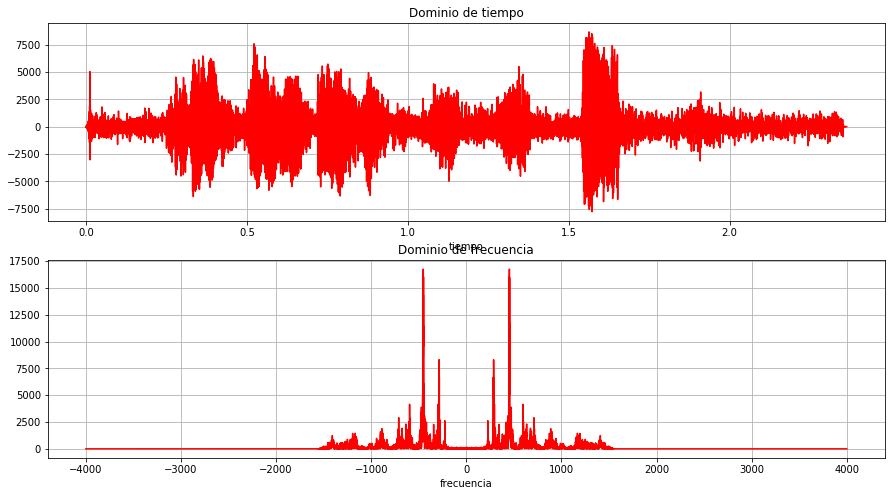

In [14]:
import numpy as np
import scipy.signal as sc
import matplotlib.pyplot as plt
import simpleaudio as sa

fs = 8000
s = np.load('chapu_noise.npy')

play_obj = sa.play_buffer(s, 1, 2, fs)
play_obj.wait_done()

N = len(s) 
t = np.arange(0, N/fs, 1/fs)

# Grafico
fig, [ tAxe, fAxe ] = plt.subplots(2, 1, figsize=(15, 8))
# Grafico señal tiempo
tAxe.grid ( True )
tAxe.set_title("Dominio de tiempo")
tAxe.set_xlim(0, N/fs)
tAxe.set_xlabel("tiempo")
tLine, = tAxe.plot(t, s, 'r-')

# FFT
f = np.arange(-fs/2,fs/2,fs/N)
sf = ((abs(np.fft.fft(s)/N))**2)
sf = np.fft.fftshift(sf)

# Grafico señal frecuencia
fAxe.grid ( True )
fAxe.set_title("Dominio de frecuencia")
fAxe.set_xlabel("frecuencia")
fLine, = fAxe.plot(f, sf, 'r')

######### FILTRO

# cargo filtro
ht, = np.load("ej4filter3.npy").astype(float)

Nh = len(ht)
t = np.arange(0, Nh/fs, 1/fs)

# Grafico
fig, [ tAxe, fAxe ] = plt.subplots(2, 1, figsize=(15, 8))
# Grafico filtro tiempo
tAxe.grid ( True )
tAxe.set_title("Dominio de tiempo")
tAxe.set_xlabel("tiempo")
tLine, = tAxe.plot(t, ht, 'r')

f = np.arange(-fs/2,fs/2,fs/Nh)
hf = ((abs(np.fft.fft(ht)/Nh))**2)
hf = np.fft.fftshift(hf)
fLine, = fAxe.plot(f, hf, 'r')


# calculate output signal
s=np.convolve(s, ht).astype(np.int16)
N = len(s)
t = np.arange(0, N/fs, 1/fs)

# Grafico
fig, [ tAxe, fAxe ] = plt.subplots(2, 1, figsize=(15, 8))
# Grafico señal tiempo
tAxe.grid ( True )
tAxe.set_title("Dominio de tiempo")
tAxe.set_xlabel("tiempo")
tLine, = tAxe.plot(t, s, 'r-')

# FFT
f = np.arange(-fs/2,fs/2,fs/N)
sf = ((abs(np.fft.fft(s)/N))**2)
sf = np.fft.fftshift(sf)

# Grafico densidad espectral frecuencia
fAxe.grid ( True )
fAxe.set_title("Dominio de frecuencia")
fAxe.set_xlabel("frecuencia")
fLine, = fAxe.plot(f, sf, 'r')


play_obj = sa.play_buffer(s, 1, 2, fs)
play_obj.wait_done()

plt.show()


Podemos ver el espectro de la señal y a partir de haber realizado zoom, podemos elegir una frecuencia de conrte cerca del 1500hz - 1550hz. El ruido corresponde a alta frecuencia como podemos ver al shitear el espectro simetrico a 0.
Se probaron con tres filtros, a continuación se muestra la mejor de las tres opciones.

![Diseño Filtro](diseno_filtro.png)

Podemos concluir escuchando la señal sonora que se pudo atenuar fuertemente la señal de alta frecuencia.